In [1]:
#imports
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

IP: 2x5

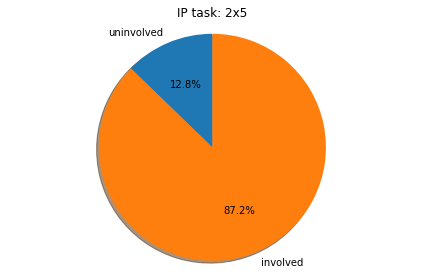

In [8]:
#dir = "C:/Users/benso/Desktop/Projects/Neural Reuse/Neural_Reuse_New/Combined/IP_Reuse/Data_2x5"
dir = "/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/IP_Reuse/Data_2x5"

files = glob.glob(os.path.join(dir, "perf_*.npy"))
files.sort()

#count[0] = no task, count[1] = task
l0 = 0
l1 = 0
for i, file in enumerate(files):
    
    ind = file.split("/")[-1].split(".")[-2].split("_")[-1]
    reuse = np.load(dir + "/stats_" + str(ind) + ".npy")
    uninvolved = reuse[0]
    involved = reuse[1]
    l0 += uninvolved
    l1 += involved
data = [l0,l1]
    

labels = 'uninvolved','involved'

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("IP task: 2x5")
plt.tight_layout()
plt.show()

CP: 2x5

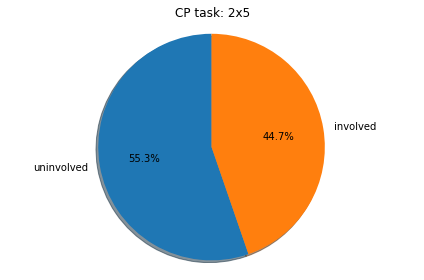

In [10]:
#dir = "C:/Users/benso/Desktop/Projects/Neural Reuse/Neural_Reuse_New/Combined/CP_Reuse/Data_2x5"
dir = "/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/CP_Reuse/Data_2x5"

files = glob.glob(os.path.join(dir, "perf_*.npy"))
files.sort()

#count[0] = no task, count[1] = task
l0 = 0
l1 = 0
for i, file in enumerate(files):
    
    ind = file.split("/")[-1].split(".")[-2].split("_")[-1]
    reuse = np.load(dir + "/stats_" + str(ind) + ".npy")
    uninvolved = reuse[0]
    involved = reuse[1]
    l0 += uninvolved
    l1 += involved
data = [l0,l1]
    

labels = 'uninvolved','involved'

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("CP task: 2x5")
plt.tight_layout()
plt.show()

CP: 2x10

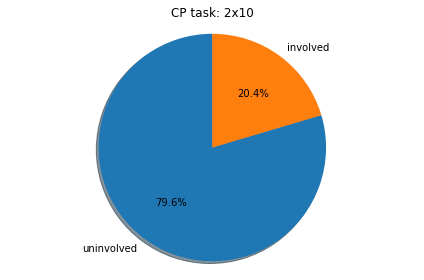

In [11]:
#dir = "C:/Users/benso/Desktop/Projects/Neural Reuse/Neural_Reuse_New/Combined/CP_Reuse/Data_2x10"
dir = "/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/CP_Reuse/Data_2x10"

files = glob.glob(os.path.join(dir, "perf_*.npy"))
files.sort()

#count[0] = no task, count[1] = task
l0 = 0
l1 = 0
for i, file in enumerate(files):
    
    ind = file.split("/")[-1].split(".")[-2].split("_")[-1]
    #for i in range(0,98):
        reuse = np.load(dir + "/stats_" + str(i) + ".npy")
        uninvolved = reuse[0]
        involved = reuse[1]
        l0 += uninvolved
        l1 += involved
data = [l0,l1]
    

labels = 'uninvolved','involved'

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("CP task: 2x10")
plt.tight_layout()
plt.show()

SEQUENTIAL TRAINING: Experiment 1:
Train for inverted pendulum, then cartpole, then legged-walker, then mountaincar. 
Results: Most neurons are IP-exclusive. 

['All', 'All', 'All', 'IP+CP+MC', 'All', 'IP+MC', 'All', 'All', 'All', 'All'] most pop
[0.9, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0]
[0.3, 0.0, 0.1, 0.0, 0.3, 0.3, 0.1, 0.2, 0.1, 0.1]
[0.0, 0.3, 0.2, 0.6, 0.2, 0.5, 0.3, 0.2, 0.5, 0.2]
[0.6, 0.7, 0.7, 0.3, 0.5, 0.2, 0.6, 0.4, 0.4, 0.7]
[0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0]
10
10


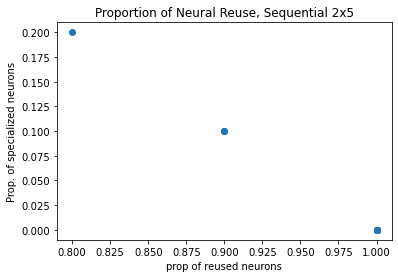

In [13]:
##################################################
# figure 5
# Lesion analysis
##################################################
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns


def plot_lesion_analysis(run_num):

    dir = "/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"
    files = glob.glob(os.path.join(dir, "perf_*.npy"))
    files.sort()

    all_categs = []
    all_counts = []
    
    for i, file in enumerate(files):
        fits = np.load(file)
        # if np.prod(fits) > 0.8:
        fits = fits**(1/4)
        if np.min(fits) > 0.8:
            ind = file.split("/")[-1].split(".")[-2].split("_")[-1]
            ipp = np.load("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data/lesions_IP_" + str(ind) + ".npy") #10 values, one for each neuron in a circuit
            cpp = np.load("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data/lesions_CP_" + str(ind) + ".npy")
            lwp = np.load("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data/lesions_LW_" + str(ind) + ".npy")
            mcp = np.load("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data/lesions_MC_" + str(ind) + ".npy")

            # Stats on neurons for Ablations
            
            Threshold = 0.85
            count = np.zeros(16)
            for (ip_neuron, cp_neuron, lw_neuron, mc_neuron) in zip(ipp, cpp, lwp, mcp):
                if (
                    ip_neuron > Threshold and cp_neuron > Threshold and lw_neuron > Threshold and mc_neuron > Threshold
                ):  # no task neurons
                    count[0] += 1
                if (
                    ip_neuron <= Threshold and cp_neuron > Threshold and lw_neuron > Threshold and mc_neuron > Threshold
                ):  # ip task neurons
                    count[1] += 1
                if (
                    ip_neuron > Threshold and cp_neuron <= Threshold and lw_neuron > Threshold and mc_neuron > Threshold
                ):  # cp task neurons
                    count[2] += 1
                if (
                    ip_neuron > Threshold and cp_neuron > Threshold and lw_neuron <= Threshold and mc_neuron > Threshold
                ):  # lw task neurons
                    count[3] += 1
                if (
                    ip_neuron > Threshold and cp_neuron > Threshold and lw_neuron > Threshold and mc_neuron <= Threshold
                ):  # mc task neurons
                    count[4] += 1
                if (
                    ip_neuron <= Threshold and cp_neuron <= Threshold and lw_neuron > Threshold and mc_neuron > Threshold
                ):  # ip and cp
                    count[5] += 1
                if (
                    ip_neuron <= Threshold and cp_neuron > Threshold and lw_neuron <= Threshold and mc_neuron > Threshold
                ):  # ip and lw
                    count[6] += 1
                if (
                    ip_neuron <= Threshold and cp_neuron > Threshold and lw_neuron > Threshold and mc_neuron <= Threshold
                ):  # ip and mc
                    count[7] += 1
                if (
                    ip_neuron > Threshold and cp_neuron <= Threshold and lw_neuron <= Threshold and mc_neuron > Threshold
                ):  #cp and lw
                    count[8] += 1
                if (
                    ip_neuron > Threshold and cp_neuron <= Threshold and lw_neuron > Threshold and mc_neuron <= Threshold
                ):  #cp and mc
                    count[9] += 1
                if (
                    ip_neuron > Threshold and cp_neuron > Threshold and lw_neuron <= Threshold and mc_neuron <= Threshold
                ):  #lw and mc
                    count[10] += 1
                if ( 
                    ip_neuron <= Threshold and cp_neuron <= Threshold and lw_neuron <= Threshold and mc_neuron > Threshold
                ): #ip, cp, lw
                    count[11] += 1
                if ( 
                    ip_neuron <= Threshold and cp_neuron <= Threshold and lw_neuron > Threshold and mc_neuron <= Threshold
                ): #ip, cp, mc
                    count[12] += 1
                if (
                    ip_neuron <= Threshold and cp_neuron > Threshold and lw_neuron <= Threshold and mc_neuron <= Threshold
                ): #ip, lw, mc
                    count[13] += 1
                if (
                    ip_neuron > Threshold and cp_neuron <= Threshold and lw_neuron <= Threshold and mc_neuron <= Threshold
                ): #cp, lw, mc
                    count[14] += 1
                if (
                    ip_neuron <=  Threshold and cp_neuron <= Threshold and lw_neuron <= Threshold and mc_neuron <= Threshold
                ):  #all 
                    count[15] += 1
                

            # making it dataframe ready
            all_counts.append(count) #count is a 1x15 array for each agent. All_counts is 15xensemble size 
            #all categories: reuse and specialization
            np.save("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"+"/COUNT"+".npy",all_counts)

            categs = ["None","IP","CP","LW","MC","IP+CP","IP+LW","IP+MC","CP+LW","CP+MC","LW+MC","IP+CP+LW","IP+CP+MC","IP+LW+MC","CP+LW+MC","All"]
            #2-neuron reuse categs:
            #5,6,7,8,9,10
            #3-neuron reuse categs:
            #11,12,13,14
            #4-neuron reuse categs: 15
            for cg, ct in zip(categs, count): #15 categories, 15 slots in count, all_categs keeps track of categories for each agent
                all_categs.append([cg, ct, i])
    #print(all_counts)
    #Pairwise data
    ip_inv = []
    cp_inv = []
    lw_inv = []
    mc_inv = []
    ip_cp = []
    ip_lw = []
    ip_mc = []
    #ip_mc_lab = []
    cp_lw = []
    cp_mc = []
    #cp_mc_lab = []
    lw_mc = []
    ip_cp_lw = []
    ip_cp_mc = []
    ip_lw_mc = []
    cp_lw_mc = []

    all_tasks = []
    no_tasks = []
    task_labels = []
    most_pop = []

    for count in all_counts: #each set of categories, in the ensemble (all_counts)
        #set of categories for each agent

        ip_inv.append(count[1])
        cp_inv.append(count[2])
        lw_inv.append(count[3])
        #mc_inv.append(count[4])
        ip_cp.append(count[5])
        ip_lw.append(count[6])
        mc_inv.append(count[4]) #number of MC-exclusive neurons in each agent
        ip_mc.append(count[7])
        cp_lw.append(count[8])
        cp_mc.append(count[9])
        lw_mc.append(count[10])
        ip_cp_lw.append(count[11])
        ip_cp_mc.append(count[12])
        ip_lw_mc.append(count[13])
        cp_lw_mc.append(count[14])
        all_tasks.append(count[15])
        no_tasks.append(count[0])
        count = list(count)
        pop = count.index(max(count)) #calculate highest value in count
        cat_pop = categs[pop] #get corresponding category 
        most_pop.append(cat_pop)
    #print(most_pop)
        
    
    np.save("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"+"/MC"+".npy",mc_inv)
    np.save("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"+"/ip_mc"+".npy",ip_mc)
    np.save("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"+"/cp_mc"+".npy",cp_mc)
    np.save("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"+"/lw_mc"+".npy",lw_mc)
    np.save("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"+"/ip_cp_mc"+".npy",ip_cp_mc)
    np.save("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"+"/ip_lw_mc"+".npy",ip_lw_mc)
    np.save("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"+"/cp_lw_mc"+".npy",cp_lw_mc)
    np.save("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"+"/all"+".npy",all_tasks)
    np.save("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"+"/none"+".npy",no_tasks)
    print(most_pop, 'most pop')
    np.save("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"+"/most_pop_cat"+".npy",most_pop)
    

    #count_data = []
    reused_count = []
    reused_count_2 = []
    reused_count_3 = []
    reused_count_4 = []
    special_count = []
    #count_data_prop = []
    for count in all_counts:
        # plt.scatter(count[1]+count[2]+count[3], np.sum(count[4:]), c="C0")
        #count_data.append([count[1] + count[2] + count[3] + count[4], np.sum(count[5:])])
        #count_data_prop.append([((count[1] + count[2] + count[3] + count[4])/20), ((np.sum(count[5:]))/20)])
        #count_data_prop.append([((np.sum(count[:4]))/20), ((np.sum(count[5:]))/20)])
        reused_count.append((np.sum(count[5:]))/10)
        reused_count_2.append((count[5]+count[6]+count[7]+count[8]+count[9]+count[10])/10)
        reused_count_3.append((count[1]+count[12]+count[13]+count[14])/10)
        reused_count_4.append((count[15])/10)
        #special_count.append((np.sum(count[1:5]))/20)
        special_count.append((count[1]+count[2]+count[3]+count[4])/10)
        #print(len(count_data_prop))
    
    print(reused_count)
    print(reused_count_2)
    print(reused_count_3)
    print(reused_count_4)
    print(special_count)

    np.save("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"+"/reused_prop"+".npy",reused_count)
    np.save("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"+"/reused_prop_2"+".npy",reused_count_2)
    np.save("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"+"/reused_prop_3"+".npy",reused_count_3)
    np.save("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"+"/reused_prop_4"+".npy",reused_count_4)
    np.save("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"+"/special_prop"+".npy",special_count)



#NEW REUSE PLOT: PROPORTION OF REUSED NEURONS

    plt.scatter(reused_count,special_count)
    print(len(reused_count))
    print(len(special_count))
    plt.title("Proportion of Neural Reuse, Sequential 2x5")
    plt.ylabel("Prop. of specialized neurons")
    plt.xlabel("prop of reused neurons")
    plt.savefig("/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/figures"+"/reuse_proportions.png")
    plt.show()

plot_lesion_analysis(11)


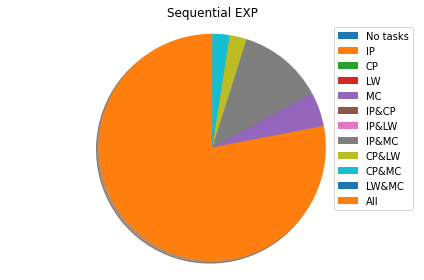

In [12]:
import glob
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
#dir = "C:/Users/benso/Desktop/Projects/Neural Reuse/Neural_Reuse_New/Combined/CP_Reuse/Data_2x10"
#ir = "/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/CP_Reuse/Data_2x10"
dir = "/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"

files = glob.glob(os.path.join(dir, "perf_*.npy"))
files.sort()

#count[0] = no task, count[1] = task
l0 = 0
l1 = 0
l2 = 0
l3 = 0
l4 = 0
l5 = 0
l6 = 0
l7 = 0
l8 = 0
l9 = 0
l10 = 0
l11 = 0
#l12 = 0
for i, file in enumerate(files):
    
    ind = file.split("/")[-1].split(".")[-2].split("_")[-1]
    #for i in list:
    reuse = np.load(dir + "/stats_" + str(ind) + ".npy")
    no_tasks = reuse[0]
    IP = reuse[1]
    CP = reuse[2]
    LW = reuse[3]
    MC = reuse[4]
    IP_CP = reuse[5]
    IP_LW = reuse[6]
    IP_MC = reuse[7]
    CP_LW = reuse[9]
    CP_MC = reuse[9]
    LW_MC = reuse[10]
    All = reuse[11]


    l0 += no_tasks
    l1 += IP
    l2 += CP
    l3 += LW
    l4 += MC
    l5 += IP_CP
    l6 += IP_LW
    l7 += IP_MC
    l8 += CP_LW
    l9 += CP_MC
    l10 += LW_MC
    l1 += All
data = [l0,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11]
    

labels = 'No tasks','IP','CP','LW','MC','IP&CP','IP&LW','IP&MC','CP&LW','CP&MC','LW&MC','All'

fig1, ax1 = plt.subplots()
ax1.pie(data, shadow=True, startangle=90)
plt.legend(labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Sequential EXP")
plt.tight_layout()
#plt.show()

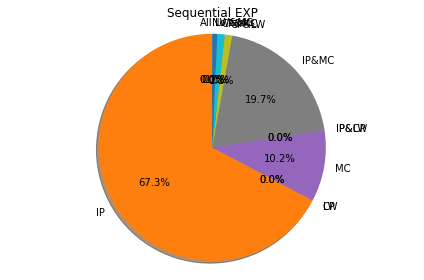

In [11]:
import glob
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
#dir = "C:/Users/benso/Desktop/Projects/Neural Reuse/Neural_Reuse_New/Combined/CP_Reuse/Data_2x10"
#ir = "/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/CP_Reuse/Data_2x10"
#dir = "/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/Sequential/data"
dir = "/Users/lvbenson/Research_Projects/Neural_Reuse_New/Combined/4T_2x5/Data"

files = glob.glob(os.path.join(dir, "perf_*.npy"))
files.sort()

#count[0] = no task, count[1] = task
l0 = 0
l1 = 0
l2 = 0
l3 = 0
l4 = 0
l5 = 0
l6 = 0
l7 = 0
l8 = 0
l9 = 0
l10 = 0
l11 = 0
#l12 = 0
for i, file in enumerate(files):
    
    ind = file.split("/")[-1].split(".")[-2].split("_")[-1]
    #for i in list:
    reuse = np.load(dir + "/stats_" + str(ind) + ".npy")
    no_tasks = reuse[0]
    IP = reuse[1]
    CP = reuse[2]
    LW = reuse[3]
    MC = reuse[4]
    IP_CP = reuse[5]
    IP_LW = reuse[6]
    IP_MC = reuse[7]
    CP_LW = reuse[9]
    CP_MC = reuse[9]
    LW_MC = reuse[10]
    All = reuse[11]


    l0 += no_tasks
    l1 += IP
    l2 += CP
    l3 += LW
    l4 += MC
    l5 += IP_CP
    l6 += IP_LW
    l7 += IP_MC
    l8 += CP_LW
    l9 += CP_MC
    l10 += LW_MC
    l1 += All
data = [l0,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11]
    

labels = 'No tasks','IP','CP','LW','MC','IP&CP','IP&LW','IP&MC','CP&LW','CP&MC','LW&MC','All'

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Sequential EXP")
plt.tight_layout()
#plt.show()